In [1]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset

In [2]:
width = 256
height = 1
npcs = 16
TRs = [5e-3, 10e-3, 20e-3]
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'line'

In [5]:
M = ssfp.ssfp([1,1,1,1,], [1,1,1,1], 1e-3, 1e-3, 30, [0,1], useSqueeze=True)
M.shape

(4, 2)

In [3]:
D = responses.gaussian(width, bw=0.2, shift=0)
M = simulation.simulate_ssfp(width, height, npcs, TRs, alpha, gradient, phantom_type)
Ic, An = simulation.train_gasp(M, D)
An = np.array(An)

(1, 256)
(1, 256)


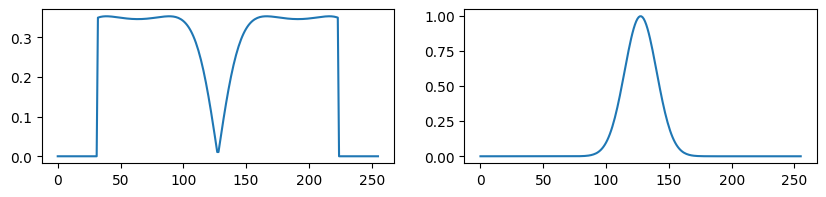

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2))

_ = np.sqrt(np.sum(np.abs(M)**2, axis=2))
_ = abs(_[:,:,0,0])
print(_.shape)
ax1.plot(_.T)

_ = np.abs(Ic)
print(_.shape)
ax2.plot(_.T)

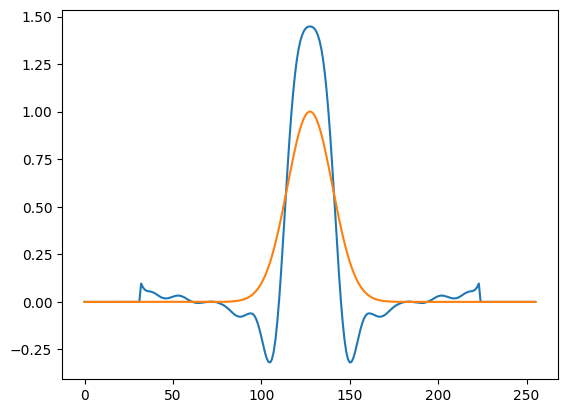

In [5]:
alpha = np.deg2rad(40)
M2 = simulation.simulate_ssfp(width, height, npcs, TRs, alpha, gradient, phantom_type)
M2 = np.reshape(M2, (M2.shape[0], M2.shape[1], -1))
I2 = simulation.evaluate_gasp(M2, An[0])
I2 = I2[int(height/2),:]
plt.plot(I2)
plt.plot(D)
plt.show()

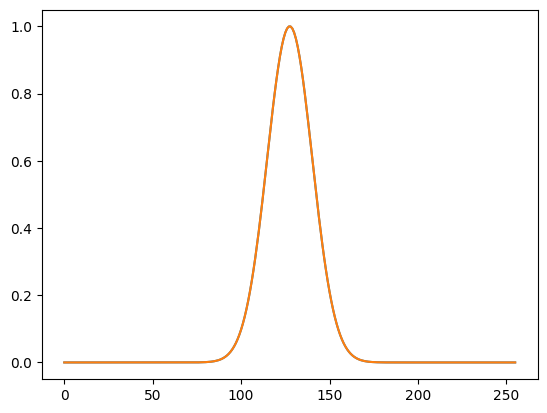

In [6]:
D = responses.gaussian(width, bw=0.2, shift=0)
M = simulation.simulate_ssfp(width, height, npcs, TRs, alpha, gradient, phantom_type)
Ic, An = simulation.train_gasp(M, D)
An = np.array(An)

M2 = simulation.simulate_ssfp(width, height, npcs, TRs, alpha, gradient, phantom_type)
M2 = np.reshape(M2, (M2.shape[0], M2.shape[1], -1))
I2 = simulation.evaluate_gasp(M2, An[0])
I2 = I2[int(height/2),:]
plt.plot(I2)
plt.plot(D)
plt.show()